# Imports

In [78]:
import numpy as np
import pandas as pd

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('ticks')

In [27]:
pd.set_option('max_colwidth', 250)

In [28]:
df = pd.read_csv('5k_Datasets/5k_tweets_lda_10.csv', index_col=0)
df.shape

/Users/eric/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(575949, 32)

In [29]:
df['date'] = pd.to_datetime(df['date'])

# Sentiment EDA

In [6]:
df.keys()

Index(['id', 'conversation_id', 'created_at', 'date', 'tweet', 'hashtags',
       'user_id', 'username', 'name', 'link', 'retweet', 'nlikes', 'nreplies',
       'nretweets', 'quote_url', 'retweet_id', 'reply_to', 'sentiment_score',
       'sentiment'],
      dtype='object')

In [7]:
# Proportion of sentiments by day
df.groupby('date')['sentiment'].value_counts(normalize=True).unstack()

sentiment,negative,neutral,positive
date,,,
2020-01-01,0.692308,0.054945,0.252747
2020-01-02,0.566879,0.089172,0.343949
2020-01-03,0.602564,0.108974,0.288462
2020-01-04,0.587097,0.083871,0.329032
2020-01-05,0.500000,0.097701,0.402299
...,...,...,...
2020-05-27,0.425400,0.180400,0.394200
2020-05-28,0.421400,0.177800,0.400800
2020-05-29,0.395200,0.148600,0.456200


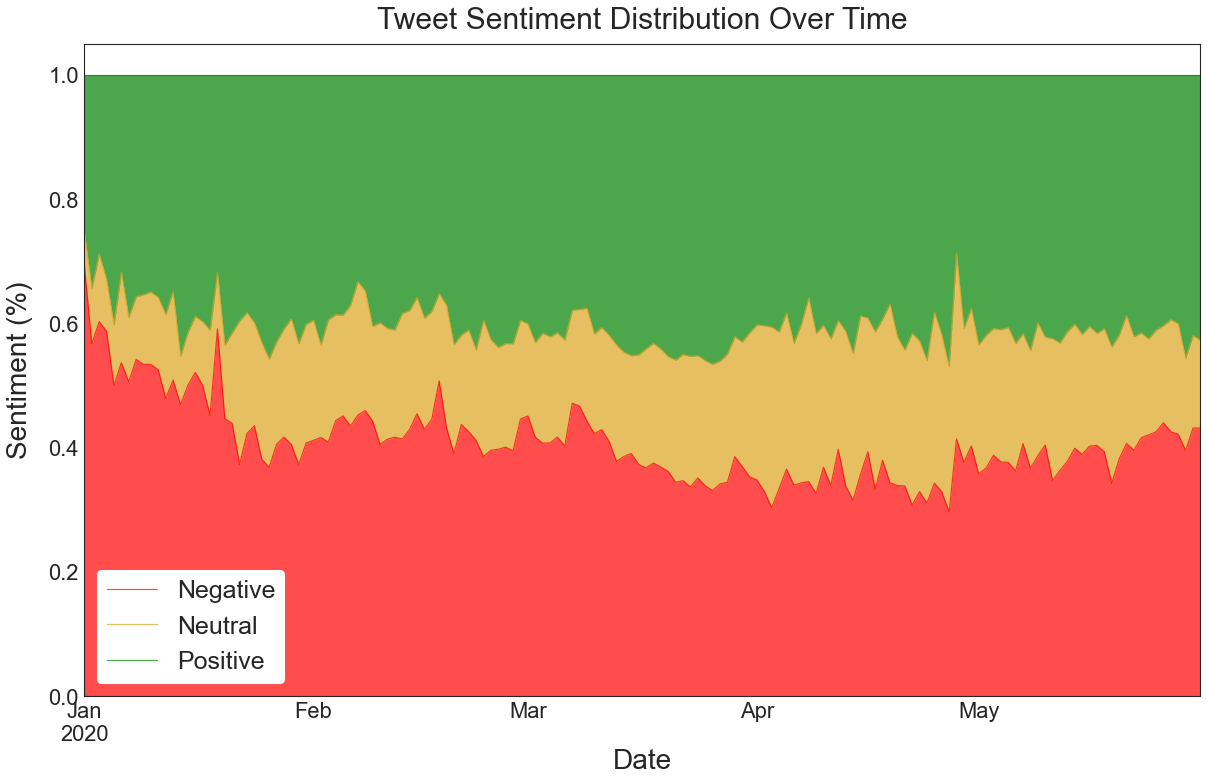

In [83]:
# Proportion of sentiments by day
sent_by_day = df.groupby('date')['sentiment'].value_counts(normalize=True).unstack()

# Plot a stacked line graph
p1 = sent_by_day.plot.area(stacked = True, figsize=(20,12),
                           color = ['red', 'goldenrod', 'green'], alpha = .70, fontsize=14)

p1.set_title('Tweet Sentiment Distribution Over Time', fontsize=30, pad=15)
p1.set_xlabel('Date', fontsize=28)
p1.set_ylabel('Sentiment (%)', fontsize=28, labelpad=15)
p1.legend(['Negative', 'Neutral', 'Positive'], facecolor='white', framealpha=1, fontsize=25)
plt.setp(p1.get_xticklabels(), fontsize=22)
plt.setp(p1.get_yticklabels(), fontsize=22);

# plt.savefig('Images/sentiment_stacked_line.png', dpi = 100)
# plt.show()

In [9]:
# Create dataframe of top twenty tweets per day by likes
top_20_by_day = []
for i in df.groupby('date')['nlikes'].nlargest(20).index:
    top_20_by_day.append(i[1])
    
top_20_by_day = df.loc[top_20_by_day]
top_20_by_day.shape

(3040, 19)

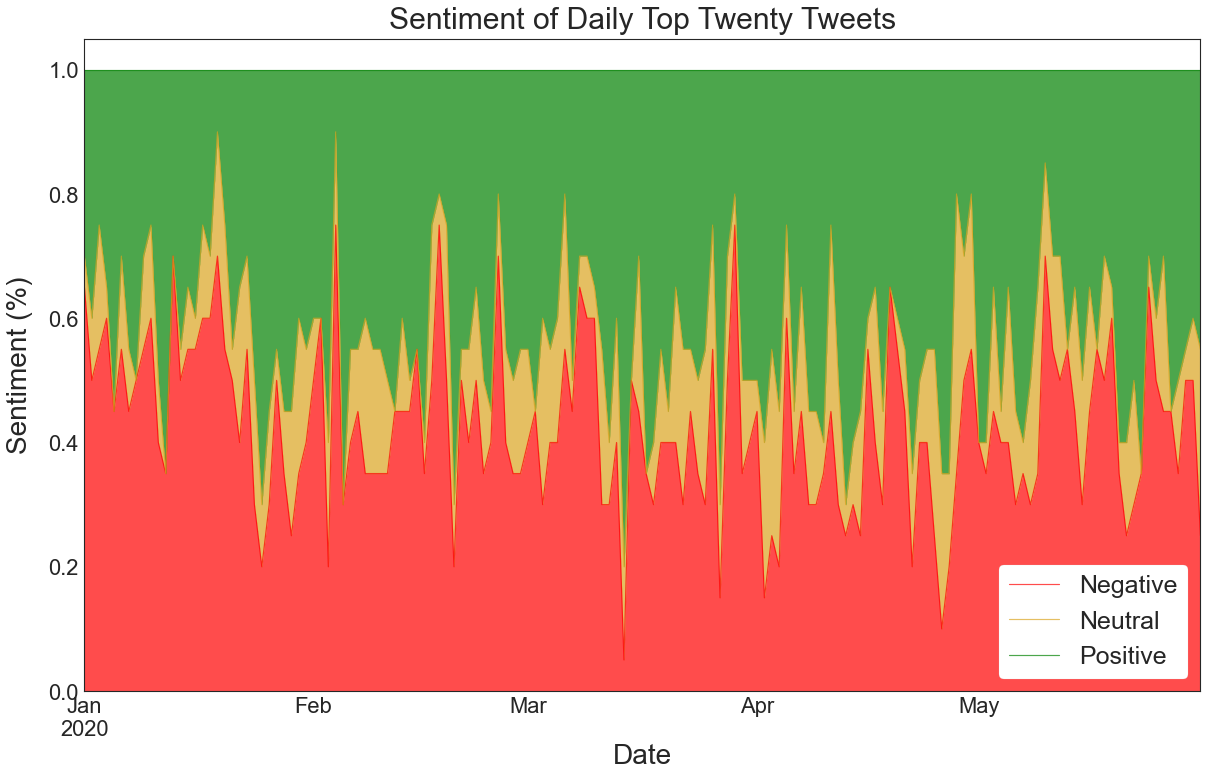

In [84]:
# Proportion of sentiments of top twenty tweets by day
sent_top_20_by_day = top_20_by_day.groupby('date')['sentiment'].value_counts(normalize=True).unstack()

# Plot a stacked line graph
p1 = sent_top_20_by_day.plot.area(stacked = True, figsize=(20,12),
                           color = ['red', 'goldenrod', 'green'], alpha = .70, fontsize=14)

p1.set_title('Sentiment of Daily Top Twenty Tweets', fontsize=30, pad=10)
p1.set_xlabel('Date', fontsize=28)
p1.set_ylabel('Sentiment (%)', fontsize=28, labelpad=15)
plt.setp(p1.get_xticklabels(), fontsize=22)
plt.setp(p1.get_yticklabels(), fontsize=22)
p1.legend(['Negative', 'Neutral', 'Positive'], facecolor='white', framealpha=1, fontsize=25)

# p1.show()

In [12]:
# Top 100 tweets by number of likes
top_100_likes = df['nlikes'].sort_values(ascending=False).head(100).index
top_100_likes = df.loc[top_100_likes]

In [13]:
top_100_likes['sentiment'].value_counts()

negative    46
positive    40
neutral     14
Name: sentiment, dtype: int64

In [14]:
# Top 1000 tweets by number of likes
top_1000_likes = df['nlikes'].sort_values(ascending=False).head(1000).index
top_1000_likes = df.loc[top_1000_likes]

In [15]:
top_1000_likes['sentiment'].value_counts()

positive    451
negative    410
neutral     139
Name: sentiment, dtype: int64

In [16]:
# Top 10000 tweets by number of likes
top_10000_likes = df['nlikes'].sort_values(ascending=False).head(10000).index
top_10000_likes = df.loc[top_10000_likes]

In [17]:
top_10000_likes['sentiment'].value_counts()

positive    4474
negative    3932
neutral     1594
Name: sentiment, dtype: int64

In [58]:
# Create dataframes for positive, neutral and negative sentiment
positive_df = df[df['sentiment'] == 'positive']
neutral_df = df[df['sentiment'] == 'neutral']
negative_df = df[df['sentiment'] == 'negative']

positive_df.shape, neutral_df.shape, negative_df.shape

((239200, 32), (115386, 32), (221363, 32))

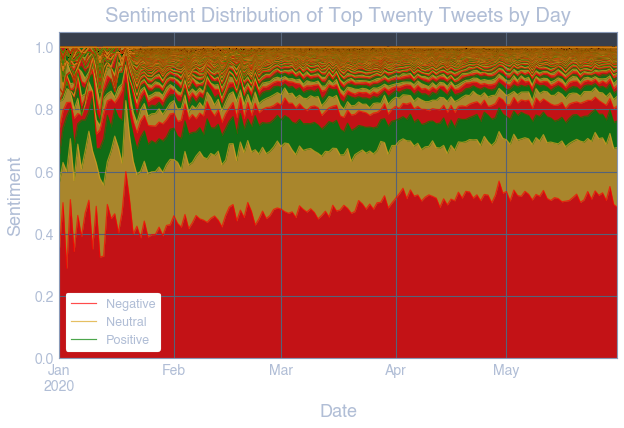

In [24]:
# Proportion of sentiments of top twenty tweets by day
positive_likes = positive_df.groupby('date')['nlikes'].value_counts(normalize=True).unstack()

# Plot a stacked line graph
p1 = positive_likes.plot.area(stacked = True, figsize=(10,6), alpha = .70, fontsize=14)

p1.set_title('Sentiment Distribution of Top Twenty Tweets by Day', fontsize=20, pad=10)
p1.set_xlabel('Date', fontsize=18, labelpad=10)
p1.set_ylabel('Sentiment', fontsize=18, labelpad=10)
p1.legend(['Negative', 'Neutral', 'Positive'], facecolor='white', framealpha=1)
# p1.show()

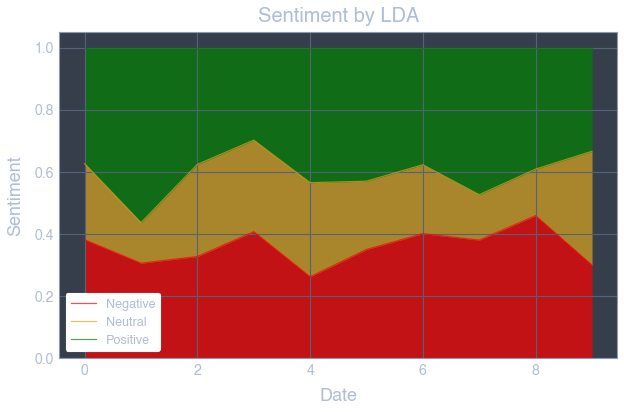

In [59]:
# Proportion of sentiments of top twenty tweets by day
sent_by_lda = df.groupby('lda')['sentiment'].value_counts(normalize=True).unstack()

# Plot a stacked line graph
p1 = sent_by_lda.plot.area(stacked = True, figsize=(10,6),
                           color = ['red', 'goldenrod', 'green'], alpha = .70, fontsize=14)

p1.set_title('Sentiment by LDA', fontsize=20, pad=10)
p1.set_xlabel('Date', fontsize=18, labelpad=10)
p1.set_ylabel('Sentiment', fontsize=18, labelpad=10)
p1.legend(['Negative', 'Neutral', 'Positive'], facecolor='white', framealpha=1)
# p1.show()

In [67]:
df['sentiment'].value_counts()

positive    239200
negative    221363
neutral     115386
Name: sentiment, dtype: int64

In [60]:
df['lda'].value_counts()

8    143873
6    117378
7     77650
1     64266
0     54469
4     29193
5     27397
9     23454
2     20047
3     18222
Name: lda, dtype: int64

In [61]:
negative_df['lda'].value_counts()

8    66055
6    47078
7    29527
0    20780
1    19654
5     9591
4     7656
3     7424
9     7032
2     6566
Name: lda, dtype: int64

In [62]:
neutral_df['lda'].value_counts()

6    26023
8    21526
0    13322
7    11345
4     8840
9     8593
1     8402
5     6023
2     5943
3     5369
Name: lda, dtype: int64

In [63]:
positive_df['lda'].value_counts()

8    56292
6    44277
7    36778
1    36210
0    20367
4    12697
5    11783
9     7829
2     7538
3     5429
Name: lda, dtype: int64

Text(0, 0.5, 'Tweet Count')

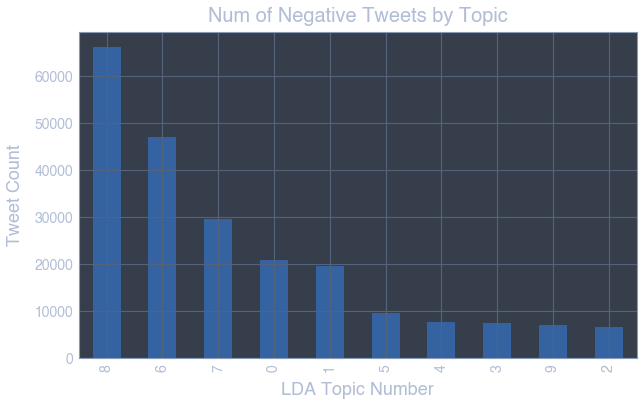

In [64]:
p1 = negative_df['lda'].value_counts().plot(kind='bar', figsize=(10,6), alpha = .70, fontsize=14)

p1.set_title('Num of Negative Tweets by Topic', fontsize=20, pad=10)
p1.set_xlabel('LDA Topic Number', fontsize=18, labelpad=10)
p1.set_ylabel('Tweet Count', fontsize=18, labelpad=10)

Text(0, 0.5, 'Tweet Count')

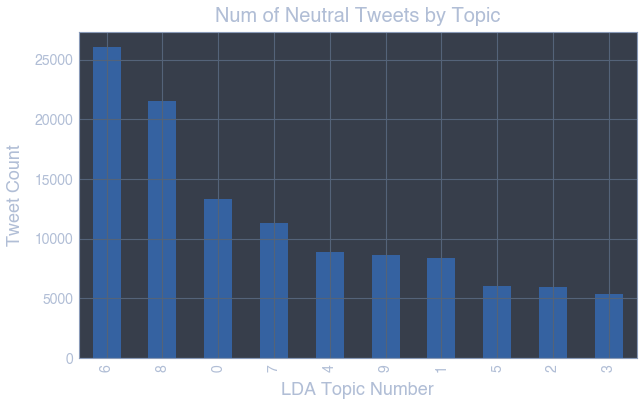

In [65]:
p1 = neutral_df['lda'].value_counts().plot(kind='bar', figsize=(10,6), alpha = .70, fontsize=14)

p1.set_title('Num of Neutral Tweets by Topic', fontsize=20, pad=10)
p1.set_xlabel('LDA Topic Number', fontsize=18, labelpad=10)
p1.set_ylabel('Tweet Count', fontsize=18, labelpad=10)

Text(0, 0.5, 'Tweet Count')

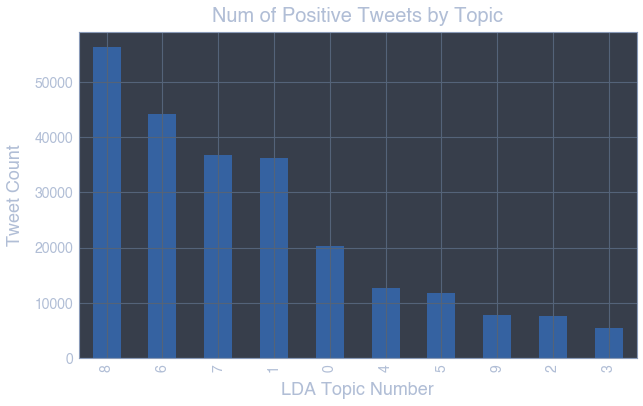

In [66]:
p1 = positive_df['lda'].value_counts().plot(kind='bar', figsize=(10,6), alpha = .70, fontsize=14)

p1.set_title('Num of Positive Tweets by Topic', fontsize=20, pad=10)
p1.set_xlabel('LDA Topic Number', fontsize=18, labelpad=10)
p1.set_ylabel('Tweet Count', fontsize=18, labelpad=10)

# Sentiment of Health Expert Tweets

In [68]:
analyser = SentimentIntensityAnalyzer()

In [71]:
analyser.polarity_scores('Seriously people- STOP BUYING MASKS! They are NOT effective in preventing general public from catching #Coronavirus, but if healthcare providers can’t get them to care for sick patients, it puts them and our communities at risk!')

{'neg': 0.271, 'neu': 0.616, 'pos': 0.113, 'compound': -0.7536}

In [74]:
analyser.polarity_scores('For most people over the age of 2, wearing a mask is completely safe. As an anesthesiologist, I wear a mask all day long to protect my patients in the operating room. Here are some tips on who should wear one, and how to wear it properly!')

{'neg': 0.0, 'neu': 0.881, 'pos': 0.119, 'compound': 0.7257}

In [75]:
analyser.polarity_scores('CDC does not currently recommend the use of facemasks to help prevent novel #coronavirus. Take everyday preventive actions, like staying home when you are sick and washing hands with soap and water, to help slow the spread of respiratory illness.')

{'neg': 0.158, 'neu': 0.622, 'pos': 0.22, 'compound': 0.2937}

In [76]:
analyser.polarity_scores('Prevent the spread of #COVID19 in your home. If possible, have sick household member: stay in a separate room, use a separate bathroom, wear a facemask when around others (within the home, in a vehicle, or doctor’s office)')

{'neg': 0.082, 'neu': 0.891, 'pos': 0.027, 'compound': -0.4939}